# `Business Understanding`

Train a machine learning model to predict the `product category` based on the other features.

# `Data Understanding`

## Importation of all necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

## Read Data

In [2]:
df = pd.read_csv('dollar_tree-231012-200322.csv')

df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


## Perform a `brief` EDA  (info(), describe(), corr() etc)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34867 non-null  float64
 15  Column1           2574 non-null   float64
dtypes: float64(8), int64(1), object(7)
memor

In [8]:
df.shape

(34867, 16)

In [11]:
df.isna().sum()

index                   0
Date                    1
Year                    1
Month                   1
Customer Age            1
Customer Gender         1
Country                 1
State                   1
Product Category        1
Sub Category            1
Quantity                1
Unit Cost               1
Unit Price              1
Cost                    1
Revenue                 0
Column1             32293
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,34867.0,17433.000000,10065.380254,0.000000,8716.500000,17433.0,26149.50,34866.0
Year,34866.0,2015.569237,0.495190,2015.000000,2015.000000,2016.0,2016.00,2016.0
Customer Age,34866.0,36.382895,11.112902,17.000000,28.000000,35.0,44.00,87.0
Quantity,34866.0,2.002524,0.813936,1.000000,1.000000,2.0,3.00,3.0
Unit Cost,34866.0,349.880567,490.015846,0.670000,45.000000,150.0,455.00,3240.0
Unit Price,34866.0,389.232485,525.319091,0.666667,53.666667,179.0,521.00,5082.0
Cost,34866.0,576.004532,690.500395,2.000000,85.000000,261.0,769.00,3600.0
Revenue,34867.0,640.870093,736.640033,2.000000,102.000000,319.0,902.00,5082.0
Column1,2574.0,688.054913,774.200897,2.000000,104.250000,390.5,975.75,3681.0


In [7]:
df.describe(include='object').T 

,count,unique,top,freq
Date,34866,576,3/1/2016,196
Month,34866,12,June,3680
Customer Gender,34866,2,M,17805
Country,34866,4,United States,18076
State,34866,45,California,10332
Product Category,34866,3,Accessories,22534
Sub Category,34866,17,Tires and Tubes,11112


# `Data Preparation`

## Data Cleaning

In [12]:
#Dropping Column1 since it contains significant amount of null values
df = df.drop('Column1',axis=1)

In [13]:
#Setting index on index column
df =df.set_index('index')

In [14]:
df.head()

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
index,,,,,,,,,,,,,,
0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0
1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0
2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0
3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0
4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0


In [15]:
df['Product Category'].unique()

array(['Accessories', 'Clothing', 'Bikes', nan], dtype=object)

In [16]:
df['Product Category'].unique().shape

(4,)

In [20]:
df.dropna(how='any')

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
index,,,,,,,,,,,,,,
0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0
1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0
2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0
3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0
4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34861,3/22/2015,2015.0,March,38.0,M,France,Charente-Maritime,Bikes,Mountain Bikes,1.0,2049.00,1487.000000,2049.0,1487.0
34862,2/7/2016,2016.0,February,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.00,985.500000,2320.0,1971.0
34863,3/13/2015,2015.0,March,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.00,1583.000000,2049.0,1583.0


In [22]:
df.corr(numeric_only=True)

,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue
Year,1.000000,0.049873,0.000919,-0.073245,-0.022628,-0.084566,-0.025361
Customer Age,0.049873,1.000000,0.004383,0.022362,0.023412,0.023641,0.024836
Quantity,0.000919,0.004383,1.000000,-0.312514,-0.324109,0.008295,0.008418
Unit Cost,-0.073245,0.022362,-0.312514,1.000000,0.981033,0.854908,0.836957
Unit Price,-0.022628,0.023412,-0.324109,0.981033,1.000000,0.832968,0.851034
Cost,-0.084566,0.023641,0.008295,0.854908,0.832968,1.000000,0.979119
Revenue,-0.025361,0.024836,0.008418,0.836957,0.851034,0.979119,1.000000


## Divide data into input and output

In [23]:
df.columns

Index(['Date', 'Year', 'Month', 'Customer Age', 'Customer Gender', 'Country',
       'State', 'Product Category', 'Sub Category', 'Quantity', 'Unit Cost',
       'Unit Price', 'Cost', 'Revenue'],
      dtype='object')

In [28]:
#Defiining Input(X) and output(y) values
X = df[['Customer Gender','Country','State','Sub Category']]  # Features
y = df['Product Category'] 

In [29]:
X.head(10)

,Customer Gender,Country,State,Sub Category
index,,,,
0,F,United States,Washington,Tires and Tubes
1,F,United States,Washington,Gloves
2,F,United States,Washington,Tires and Tubes
3,F,United States,Washington,Tires and Tubes
4,F,United States,Washington,Tires and Tubes
5,F,United States,Washington,Tires and Tubes
6,F,United States,Washington,Tires and Tubes
7,F,United States,Washington,Tires and Tubes
8,F,United States,Washington,Tires and Tubes


In [30]:
y.info()

<class 'pandas.core.series.Series'>
Index: 34867 entries, 0 to 34866
Series name: Product Category
Non-Null Count  Dtype 
--------------  ----- 
34866 non-null  object
dtypes: object(1)
memory usage: 544.8+ KB


In [31]:
# drop null values in x and y
X = X.dropna()
y = y.dropna()

In [32]:
X.shape

(34866, 4)

In [33]:
#Splitting dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
X_train.shape

(27892, 4)

In [35]:
y_train.shape

(27892,)

## Encoding

### 1. Encode the target column (the labels)


In [36]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [37]:
y_train_encoded

array([0, 0, 2, ..., 1, 0, 0])

### 2. Encode categorical columns

In [38]:
categorical_columns = ['Customer Gender','Country','State','Sub Category']

In [39]:
X_train

,Customer Gender,Country,State,Sub Category
index,,,,
24328,M,United States,Washington,Tires and Tubes
5096,M,Germany,Nordrhein-Westfalen,Bottles and Cages
14118,F,United States,Oregon,Jerseys
18429,F,United States,California,Helmets
17957,F,United States,Oregon,Helmets
...,...,...,...,...
16850,F,United States,Washington,Tires and Tubes
6265,F,United States,California,Tires and Tubes
11284,M,United States,California,Mountain Bikes


In [40]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_columns]))
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_columns]))

In [41]:
X_train_encoded

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27887,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27888,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27889,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
27890,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [42]:
categorical_columns

['Customer Gender', 'Country', 'State', 'Sub Category']

### Replace original categorical columns with encoded ones
##### Don't forget Reset indices to ensure proper alignment when I concatenate


In [43]:
#dropping categorical_columns
non_categorical = X_train.drop(categorical_columns,axis =1)


In [44]:
non_categorical.shape

(27892, 0)

In [45]:
X_train.shape


(27892, 4)

In [46]:
#Reseting indices to ensure proper alignment when we concatinate
non_categorical.reset_index(drop=True, inplace=True)
X_train_encoded.reset_index(drop=True, inplace=True)

In [47]:
X_train_encoded.shape

(27892, 64)

In [48]:
y_train_encoded.shape

(27892,)

In [49]:
# concatenating the encoded columns with the xtrain
X_train = pd.concat([non_categorical, X_train_encoded], axis=1)
X_train

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27887,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27888,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27889,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
27890,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [51]:
# concatenating the xtest with the encoded columns
X_test = pd.concat([non_categorical, X_test_encoded], axis=1)

# `Modeling`

In [52]:
# training our model using K-Nearest Neighbors (K-NN) Classifier
X_train.columns = X_train.columns.astype(str)
k_model = KNeighborsClassifier(n_neighbors=5)

k_model.fit(X_train,y_train_encoded)


KNeighborsClassifier()

In [53]:
X_test = X_test.dropna()
X_test.columns = X_test.columns.astype(str)

pred = k_model.predict(X_test)

In [54]:
accuracy = accuracy_score(y_test_encoded, pred)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


# `Evaluation`

### Plot the confusion Matrix using  `matplotlib` and or `seaborn`

<Axes: >

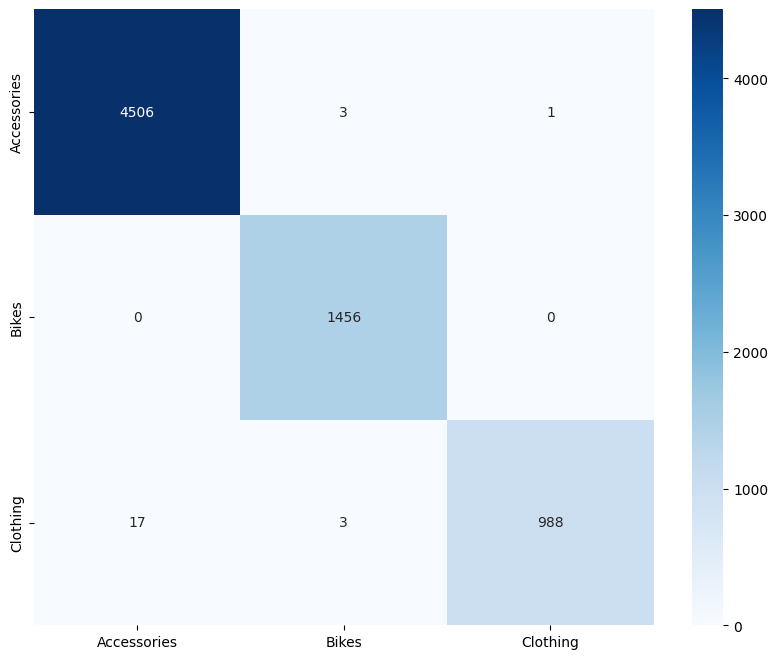

In [56]:
matrix = confusion_matrix(y_test_encoded, pred)

plt.figure(figsize=(10,8))
sns.heatmap(matrix, cmap='Blues', annot=True, xticklabels=label_encoder.classes_ , yticklabels=label_encoder.classes_, fmt='d')

### Build a classification Report

In [55]:
print(classification_report(y_test_encoded, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4510
           1       1.00      1.00      1.00      1456
           2       1.00      0.98      0.99      1008

    accuracy                           1.00      6974
   macro avg       1.00      0.99      1.00      6974
weighted avg       1.00      1.00      1.00      6974

